# Finans Projekt 1 - English
This notebook is for assistance with the coding for many of the questions in the project.
The sections are marked with the corresponding question in the Project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions

#### Initialize python packages

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read Data

In [25]:
# path to project data (replace with your own path)
file_path = '~/introstat/projects/finans3/finans1_data.csv'
## Read data into a pandas DataFrame
D = pd.read_csv(file_path, delimiter=";")
D[["t","AGG","VAW","IWN","SPY"]]

,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815
...,...,...,...,...,...
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394


#### a) Simple summary of data

In [26]:
D = D[["t","AGG","VAW","IWN","SPY"]]
print(f"Dimension of DataFrame: {D.shape}") # f-strings allow us to insert variables directly into the string
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:") # \n is the newline character for strings
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (454, 5)
Variable names: Index(['t', 'AGG', 'VAW', 'IWN', 'SPY'], dtype='object')

First few rows of DataFrame:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815


Last row of DataFrame:


,t,AGG,VAW,IWN,SPY
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394
453,2015-5-8,-0.000453,0.004074,0.002566,0.004271


Some summary statistics:


,AGG,VAW,IWN,SPY
count,454.000000,454.000000,454.000000,454.000000
mean,0.000266,0.001794,0.001188,0.001360
std,0.005976,0.036083,0.032015,0.024786
min,-0.029604,-0.203660,-0.179655,-0.137598
25%,-0.002973,-0.016096,-0.014305,-0.011325
50%,0.000237,0.004798,0.003120,0.004216
75%,0.003893,0.019685,0.019056,0.014498
max,0.030507,0.142977,0.126702,0.083276


Data types: t       object
AGG    float64
VAW    float64
IWN    float64
SPY    float64
dtype: object


#### b) Summary statistics

In [27]:
# Calculate the required statistics
D2 = D[["AGG", "VAW", "IWN", "SPY"]]
no_obs = D2.notna().sum()
avg = D2.mean()
var = D2.var(ddof=1)
sd = D2.std(ddof=1)
quantiles = pd.DataFrame(np.quantile(D2, [0.25, 0.5, 0.75],
                                     method='averaged_inverted_cdf', axis=0).T,
                                     index=D2.columns)

#### Statistical analysis I

#### d)

In [28]:
covariance_table = D[['AGG', 'VAW', 'IWN', 'SPY']].cov()
print(covariance_table)

          AGG       VAW       IWN       SPY
AGG  0.000036 -0.000043 -0.000026 -0.000032
VAW -0.000043  0.001302  0.000984  0.000793
IWN -0.000026  0.000984  0.001025  0.000722
SPY -0.000032  0.000793  0.000722  0.000614


#### f) 

#### Problem 2 - Best investment

#### g) 

Text(0.5, 1.0, 'AGG')

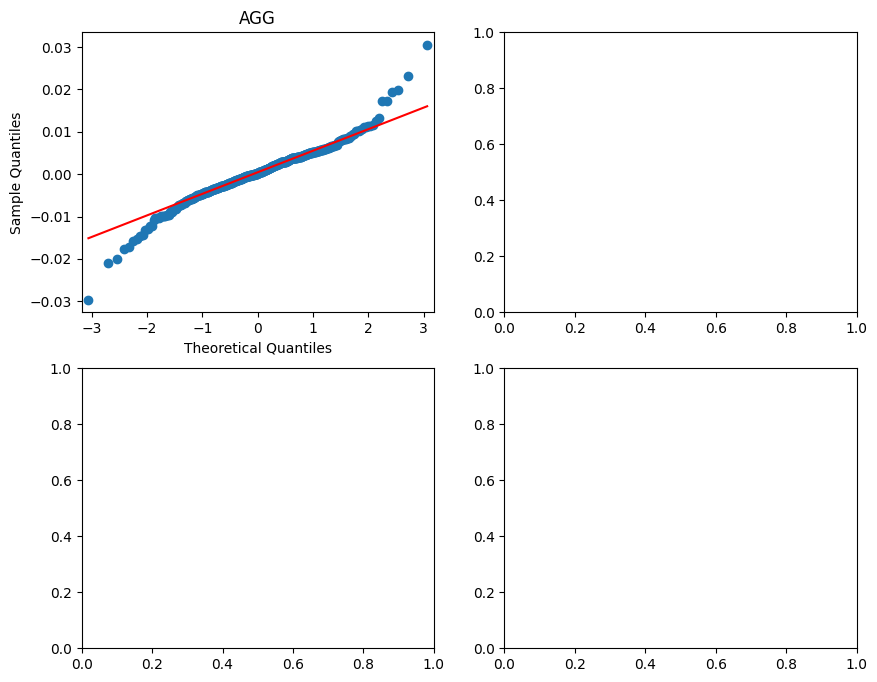

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sm.qqplot(D2["AGG"].dropna(), line ='q',a=1/2,ax=axs[0, 0])
axs[0, 0].set_title('AGG')
## Do the same for the other ETFs

#### h) Tests

In [30]:
###########################
## Calculations of the 95% confidence intervals
## t-quantile for the confidence interval for the mean of AGG,
## since the degrees of freedom for the mean of AGG are 453
cri_val = stats.t.ppf(0.975, 453)
cri_val

np.float64(1.9652145681681557)

## EXTRA
#### Subsets in Python

In [31]:
## df['AGG'] < 0 returns all observations where AGG is negative
## Can be used to extract all AGG losses
loss_weeks = D['AGG'] < 0
agg_losses = D['AGG'][loss_weeks]
print("Weeks with negative returns in AGG:")
display(agg_losses)

## Alternatively, use the 'query' method
agg_losses_query = D.query('AGG < 0')
print("Weeks with negative returns in AGG (query method):")
display(agg_losses_query)
# Or use the 'loc' method
agg_losses_loc = D.loc[D['AGG'] < 0, 'AGG']
print("Weeks with negative returns in AGG (loc method):")
display(agg_losses_loc)

## More complex logical expressions can be made, e.g.:
## Find all observations from weeks where AGG had a loss and SPY had a gain
agg_loss_spy_gain = D.query('AGG < 0 & SPY > 0')
print("Weeks with negative AGG returns and positive SPY returns:")
display(agg_loss_spy_gain)

# "display()" function gives a nicer table than print. It is 
# especially useful when working with dataframes (pandas)

Weeks with negative returns in AGG:


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative returns in AGG (query method):


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815
6,2006-6-19,-0.005812,0.001998,-0.005530,-0.002581
7,2006-6-26,-0.005744,0.035400,0.017855,0.010674
...,...,...,...,...,...
444,2015-3-5,-0.004508,-0.009821,-0.007532,-0.004352
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394


Weeks with negative returns in AGG (loc method):


0     -0.006088
1     -0.003675
4     -0.004775
6     -0.005812
7     -0.005744
         ...   
444   -0.004508
449   -0.001615
451   -0.001522
452   -0.010404
453   -0.000453
Name: AGG, Length: 214, dtype: float64

Weeks with negative AGG returns and positive SPY returns:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
7,2006-6-26,-0.005744,0.035400,0.017855,0.010674
14,2006-8-15,-0.000101,0.007605,0.019658,0.009575
22,2006-10-11,-0.009680,0.024822,0.008839,0.001408
24,2006-10-25,-0.000201,0.015830,0.004393,0.012885
...,...,...,...,...,...
441,2015-2-11,-0.009559,0.025773,0.002199,0.014064
442,2015-2-19,-0.003067,0.030951,0.014759,0.014739
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793


#### Additional Python tips

In [32]:
## Make a for loop to calculate some summary 
## statistics and save the result in a new data frame
Tbl = pd.DataFrame()
for i in ['AGG', 'VAW', 'IWN', 'SPY']:
    Tbl.loc[i, "ETF_mean"] = D[i].mean()
    Tbl.loc[i, "ETF_var"] = D[i].var(ddof=1) 
    
# show
display(Tbl)

,ETF_mean,ETF_var
AGG,0.000266,0.000036
VAW,0.001794,0.001302
IWN,0.001188,0.001025
SPY,0.001360,0.000614


In [33]:
# There are many other ways to do these calculations, some more concise. For example
# Calculate mean and variance for all columns but 't'
result = D.drop(columns='t').agg(['mean', 'var'])

# The agg function(aggregate) is used to calculate the mean and variance of returns for each ETF.
display(result)

# See more functions in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# Numpy documentationen: https://numpy.org/doc/stable/reference/index.html
# Or find documentation or guides on other python packages/functions online.

,AGG,VAW,IWN,SPY
mean,0.000266,0.001794,0.001188,0.001360
var,0.000036,0.001302,0.001025,0.000614


#### Latex Tips
Pandas (pd) also includes a function that is very handy for writing tables/dataframes directly into Latex-code. 
This is done by usind the function `pd.to_latex()`.